In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the data
data_cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv('/content/data_banknote_authentication.txt', names=data_cols)

In [3]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


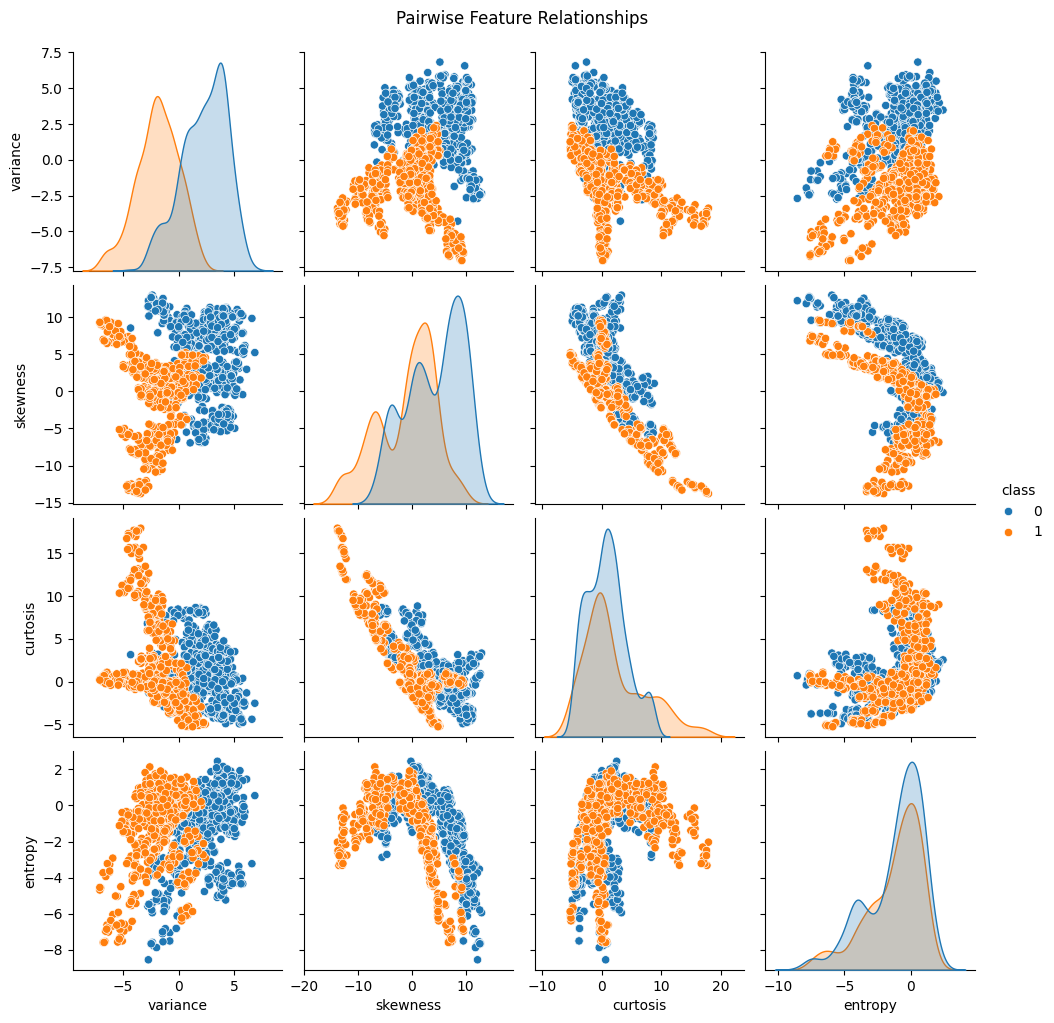

In [4]:
# Pairplot visualization
sns.pairplot(df, hue='class', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

# Feature relationship

From the pairplots, we can observe that the classes (0 and 1) appear to be reasonably separable in most feature combinations

Some features show clear linear separation (like variance vs curtosis), while others show more complex boundaries

In [5]:
# Data Processing and Splitting Data
# Defining X and y
X = df.drop('class', axis=1)
y = df['class']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state for reproducibility

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1097, 4)
Testing data shape: (275, 4)


In [7]:
parameter_combinations = [
    {'max_depth': None, 'min_samples_split': 2, 'criterion':'gini'},
    {'max_depth': 5, 'min_samples_split': 5, 'criterion':'gini'},
    {'max_depth': 10, 'min_samples_split': 10, 'criterion':'gini'},
    {'max_depth': None, 'min_samples_split': 2, 'criterion':'entropy'},
    {'max_depth': 5, 'min_samples_split': 5, 'criterion':'entropy'},
    {'max_depth': 10, 'min_samples_split': 10, 'criterion':'entropy'},
]

In [8]:
results = []
for params in parameter_combinations:
  print(f"\nTraining with parameters : {params}")
  df_classifier = DecisionTreeClassifier(
        max_depth = params['max_depth'],
        min_samples_split = params['min_samples_split'],
        criterion = params['criterion'],
        random_state = 42
    )
  df_classifier.fit(X_train, y_train)
  y_pred = df_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)

  results.append({
        'params': params,
        'accuracy': accuracy,
        'precision_0': report['0']['precision'],
        'recall_0': report['0']['recall'],
        'f1_0': report['0']['f1-score'],
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1_1': report['1']['f1-score']
    })


Training with parameters : {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}

Training with parameters : {'max_depth': 5, 'min_samples_split': 5, 'criterion': 'gini'}

Training with parameters : {'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini'}

Training with parameters : {'max_depth': None, 'min_samples_split': 2, 'criterion': 'entropy'}

Training with parameters : {'max_depth': 5, 'min_samples_split': 5, 'criterion': 'entropy'}

Training with parameters : {'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy'}


In [9]:
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df.to_string(index=False))



Summary of Results:
                                                             params  accuracy  precision_0  recall_0     f1_0  precision_1  recall_1     f1_1
   {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}  0.981818     0.967320  1.000000 0.983389     1.000000  0.960630 0.979920
      {'max_depth': 5, 'min_samples_split': 5, 'criterion': 'gini'}  0.967273     0.942675  1.000000 0.970492     1.000000  0.929134 0.963265
    {'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini'}  0.981818     0.967320  1.000000 0.983389     1.000000  0.960630 0.979920
{'max_depth': None, 'min_samples_split': 2, 'criterion': 'entropy'}  0.985455     0.973684  1.000000 0.986667     1.000000  0.968504 0.984000
   {'max_depth': 5, 'min_samples_split': 5, 'criterion': 'entropy'}  0.978182     0.967105  0.993243 0.980000     0.991870  0.960630 0.976000
 {'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy'}  0.981818     0.973510  0.993243 0.983278     0.991935  0.9

# Summary
From the Results, we can clearly see that max_depth = None, min_samples_split = 2, criterion = Entropy have the best result between them. So, I will be using this Result to find the best parameters.


In [10]:
parameter_combinations = [
    {'max_depth': None, 'min_samples_split': 2, 'criterion':'entropy'},
    {'max_depth': None, 'min_samples_split': 5, 'criterion':'entropy'},
    {'max_depth': None, 'min_samples_split': 10, 'criterion':'entropy'},
    {'max_depth': 5, 'min_samples_split': 2, 'criterion':'entropy'},
    {'max_depth': 5, 'min_samples_split': 5, 'criterion':'entropy'},
    {'max_depth': 5, 'min_samples_split': 10, 'criterion':'entropy'},
    {'max_depth': 10, 'min_samples_split': 2, 'criterion':'entropy'},
    {'max_depth': 10, 'min_samples_split': 5, 'criterion':'entropy'},
    {'max_depth': 10, 'min_samples_split': 5, 'criterion':'entropy'},
]

In [11]:
results = []
for params in parameter_combinations:
  print(f"\nTraining with parameters : {params}")
  df_classifier = DecisionTreeClassifier(
        max_depth = params['max_depth'],
        min_samples_split = params['min_samples_split'],
        criterion = params['criterion'],
        random_state = 42
    )
  df_classifier.fit(X_train, y_train)
  y_pred = df_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)

  results.append({
        'params': params,
        'accuracy': accuracy,
        'precision_0': report['0']['precision'],
        'recall_0': report['0']['recall'],
        'f1_0': report['0']['f1-score'],
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1_1': report['1']['f1-score']
    })


Training with parameters : {'max_depth': None, 'min_samples_split': 2, 'criterion': 'entropy'}

Training with parameters : {'max_depth': None, 'min_samples_split': 5, 'criterion': 'entropy'}

Training with parameters : {'max_depth': None, 'min_samples_split': 10, 'criterion': 'entropy'}

Training with parameters : {'max_depth': 5, 'min_samples_split': 2, 'criterion': 'entropy'}

Training with parameters : {'max_depth': 5, 'min_samples_split': 5, 'criterion': 'entropy'}

Training with parameters : {'max_depth': 5, 'min_samples_split': 10, 'criterion': 'entropy'}

Training with parameters : {'max_depth': 10, 'min_samples_split': 2, 'criterion': 'entropy'}

Training with parameters : {'max_depth': 10, 'min_samples_split': 5, 'criterion': 'entropy'}

Training with parameters : {'max_depth': 10, 'min_samples_split': 5, 'criterion': 'entropy'}


In [12]:
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df.to_string(index=False))



Summary of Results:
                                                              params  accuracy  precision_0  recall_0     f1_0  precision_1  recall_1    f1_1
 {'max_depth': None, 'min_samples_split': 2, 'criterion': 'entropy'}  0.985455     0.973684  1.000000 0.986667     1.000000  0.968504 0.98400
 {'max_depth': None, 'min_samples_split': 5, 'criterion': 'entropy'}  0.985455     0.973684  1.000000 0.986667     1.000000  0.968504 0.98400
{'max_depth': None, 'min_samples_split': 10, 'criterion': 'entropy'}  0.981818     0.973510  0.993243 0.983278     0.991935  0.968504 0.98008
    {'max_depth': 5, 'min_samples_split': 2, 'criterion': 'entropy'}  0.978182     0.967105  0.993243 0.980000     0.991870  0.960630 0.97600
    {'max_depth': 5, 'min_samples_split': 5, 'criterion': 'entropy'}  0.978182     0.967105  0.993243 0.980000     0.991870  0.960630 0.97600
   {'max_depth': 5, 'min_samples_split': 10, 'criterion': 'entropy'}  0.978182     0.967105  0.993243 0.980000     0.991870  0.

# Second Summary
From the second Results, We can choose 5 different parameter combination so, I will be using the same result from before.

In [13]:
df_classifier = DecisionTreeClassifier(max_depth=None, min_samples_split=2, criterion='entropy', random_state=42)
df_classifier.fit(X_train, y_train)
y_pred = df_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)

Accuracy: 0.9854545454545455

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       148
           1       1.00      0.97      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



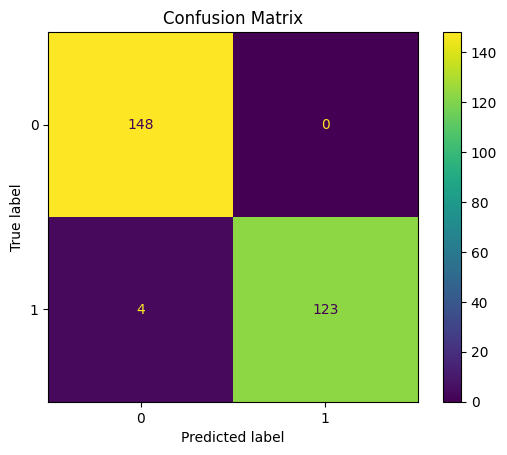

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

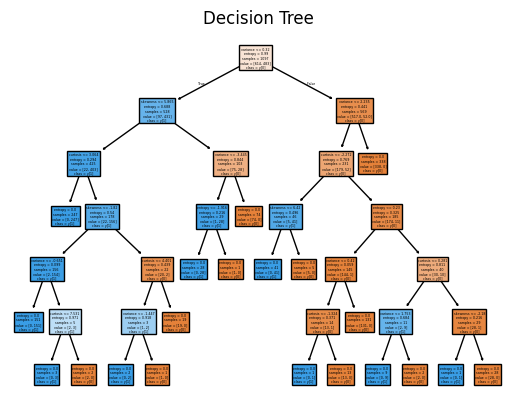

In [16]:
pt = plot_tree(df_classifier, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree")
plt.show()

In [20]:
feature_importances_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : df_classifier.feature_importances_
})
feature_importances_df

,Feature,Importance
0,variance,0.598308
1,skewness,0.231687
2,curtosis,0.146622
3,entropy,0.023383


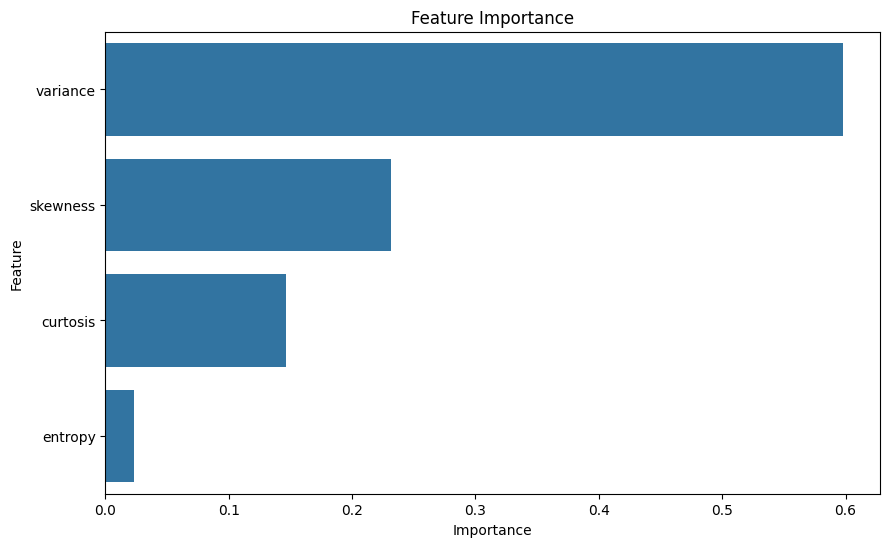

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
